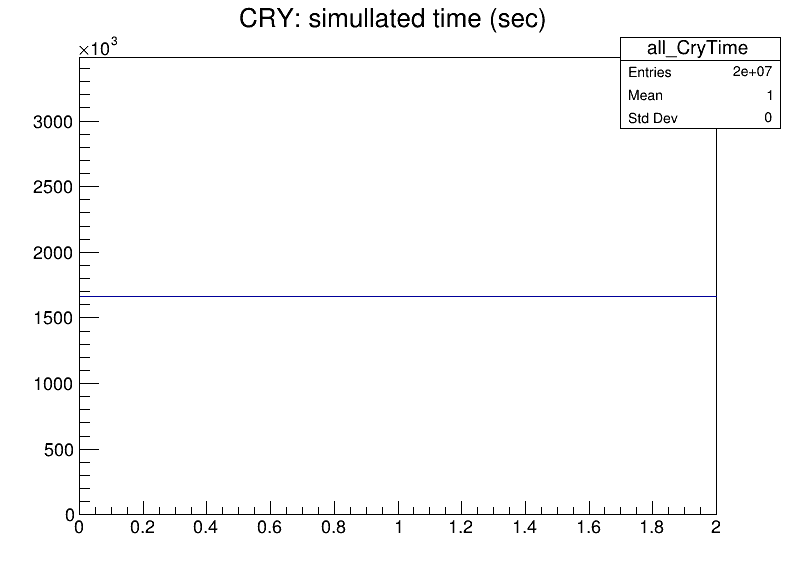

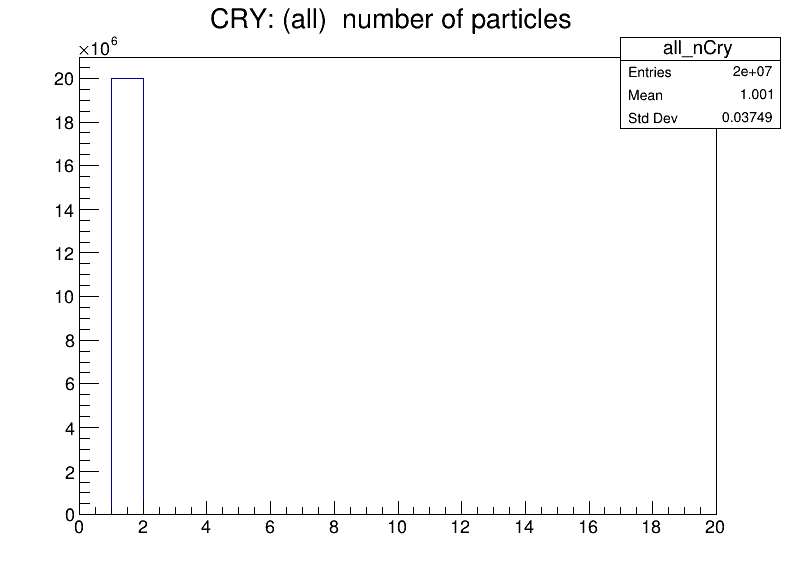

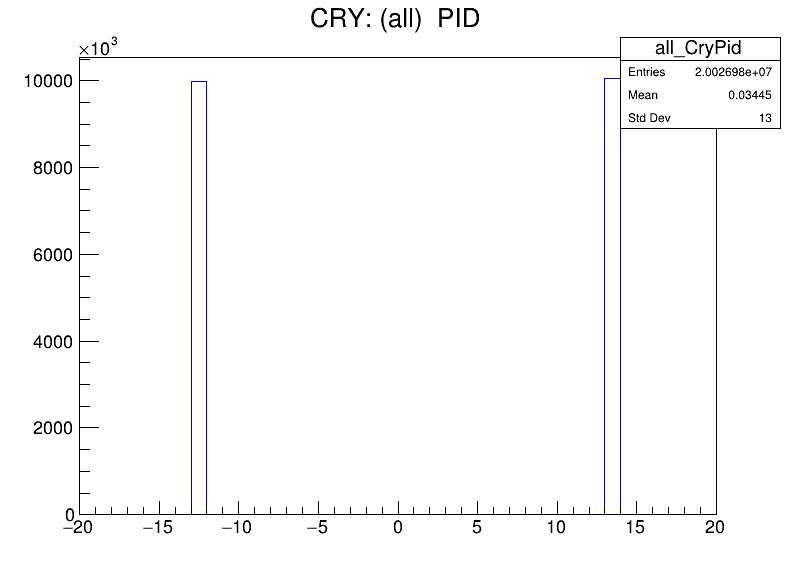

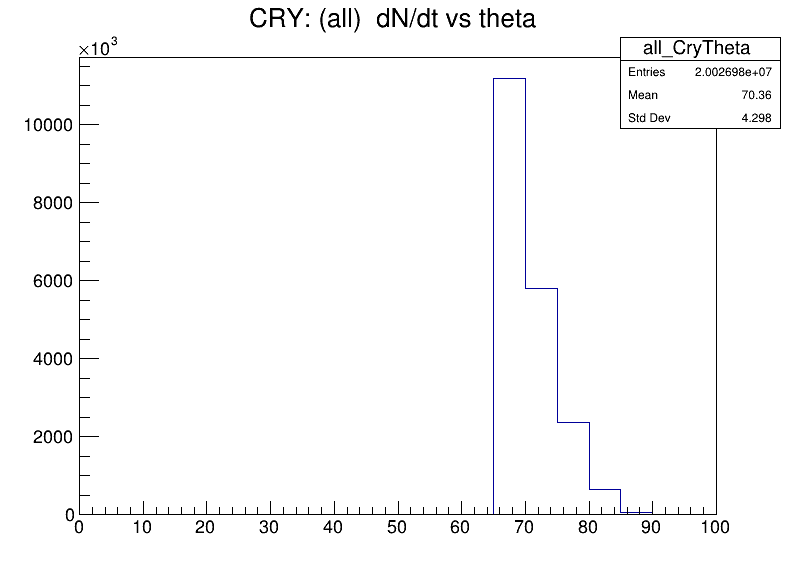

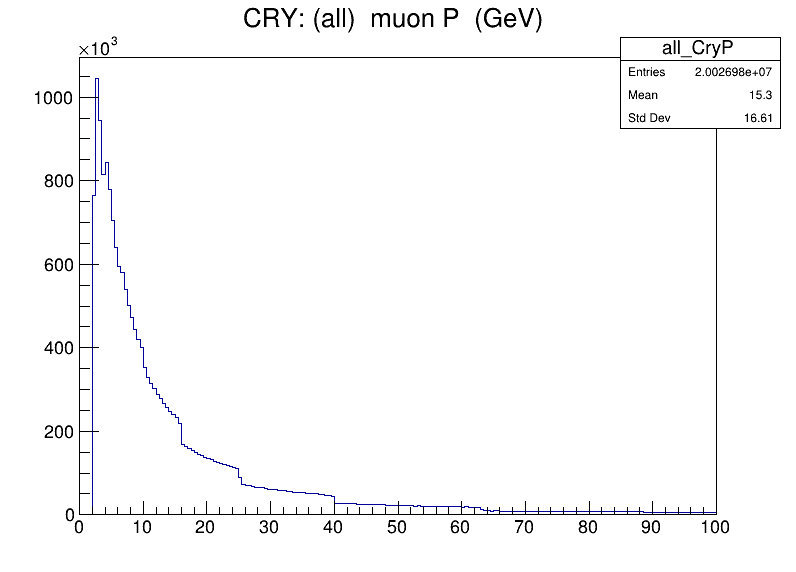

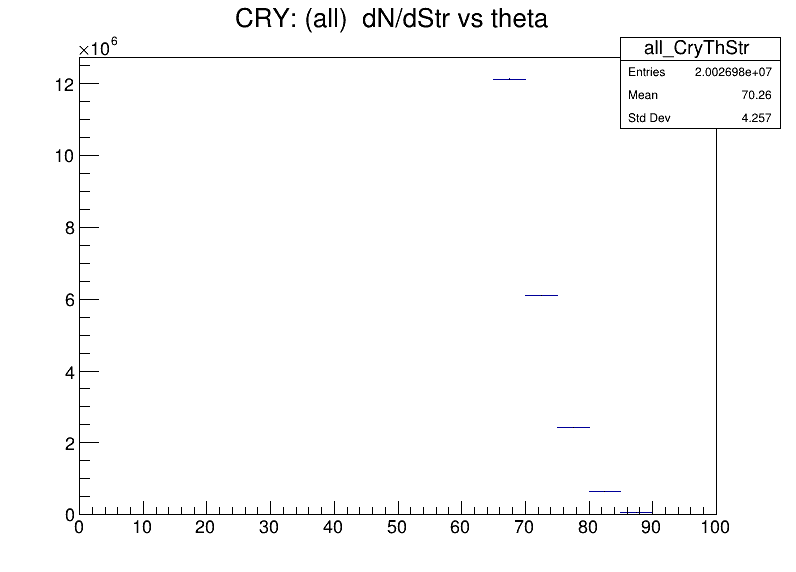

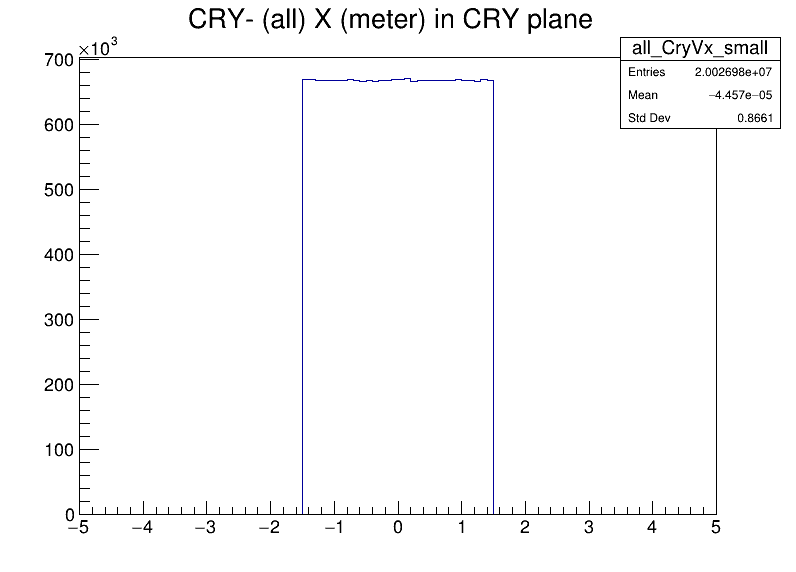

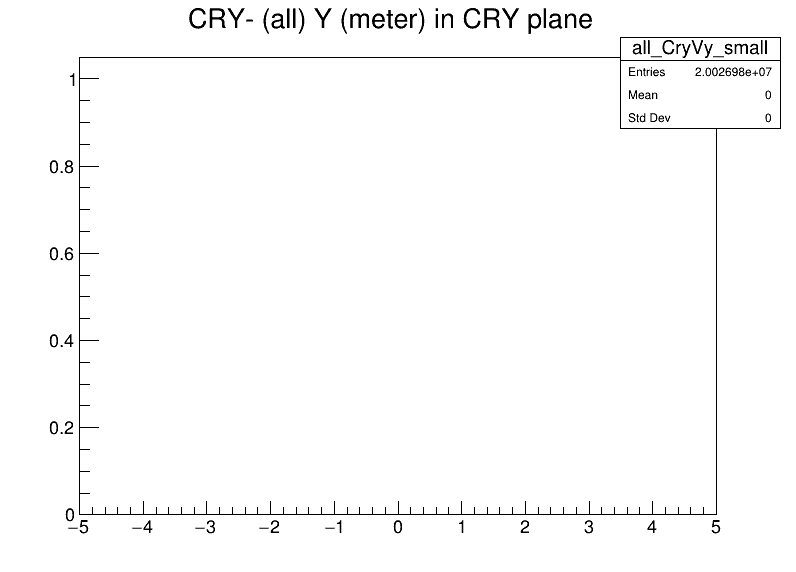

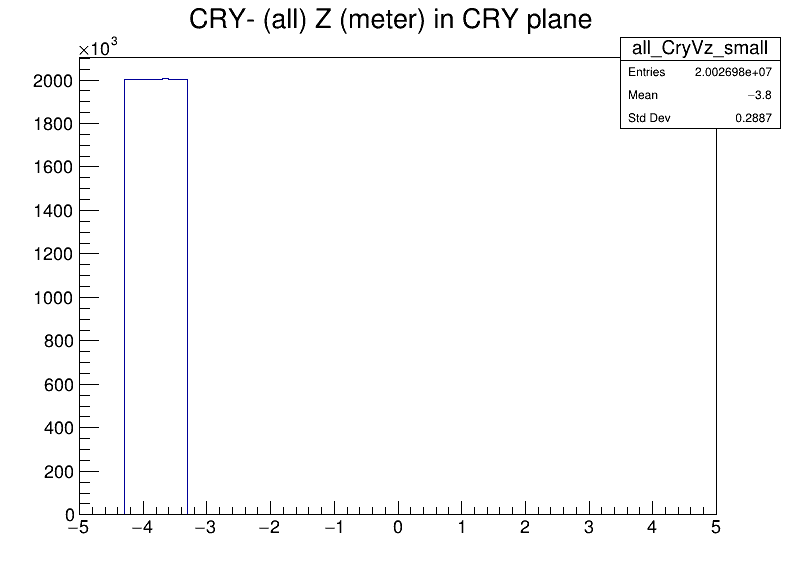

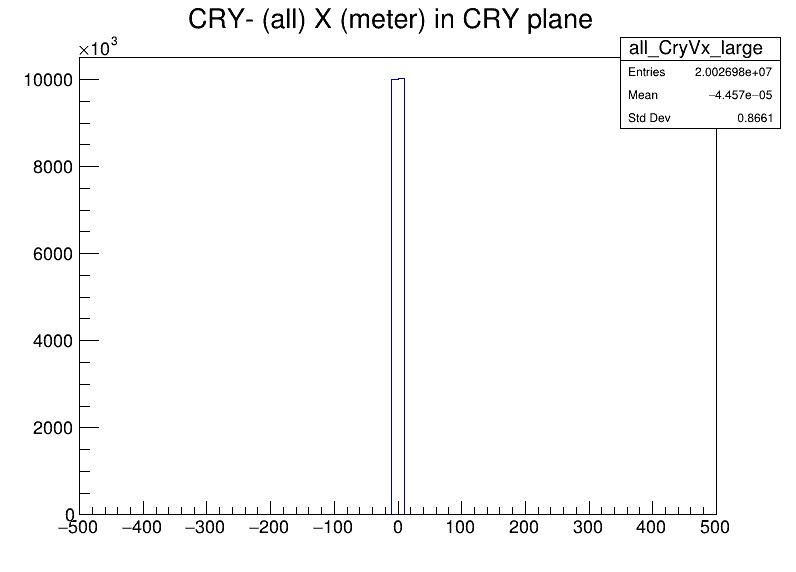

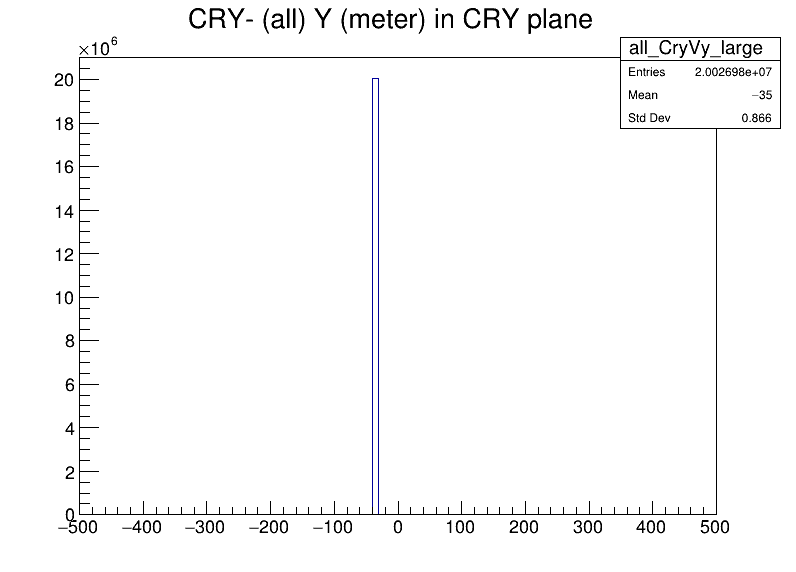

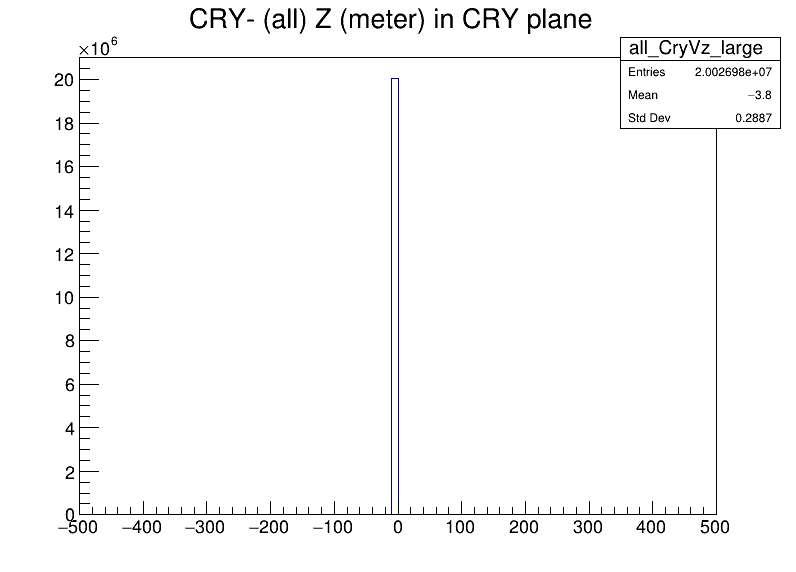

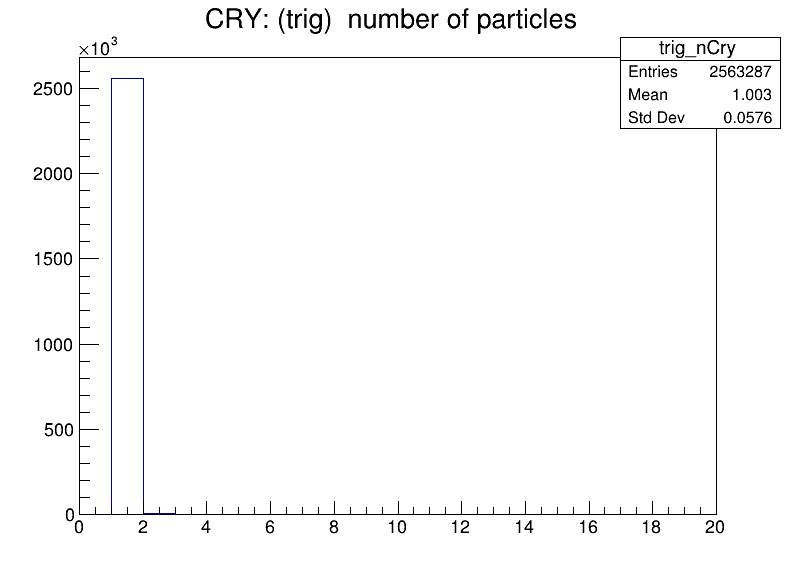

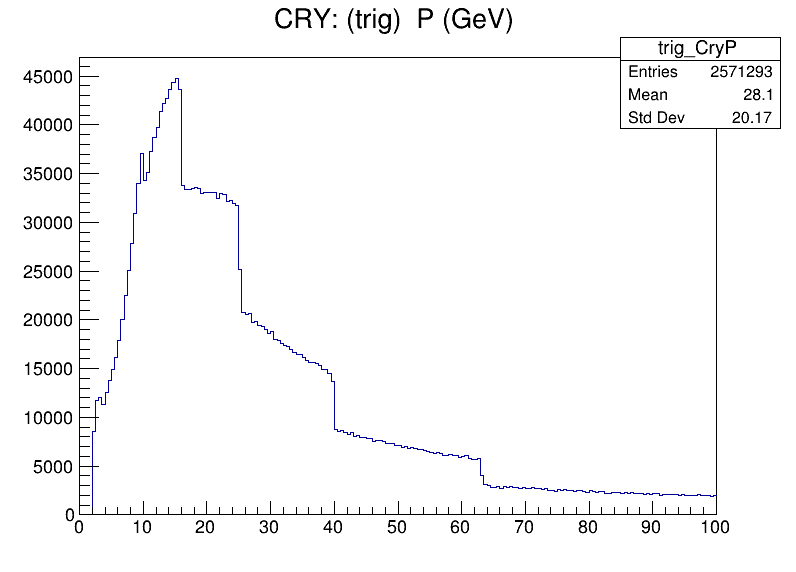

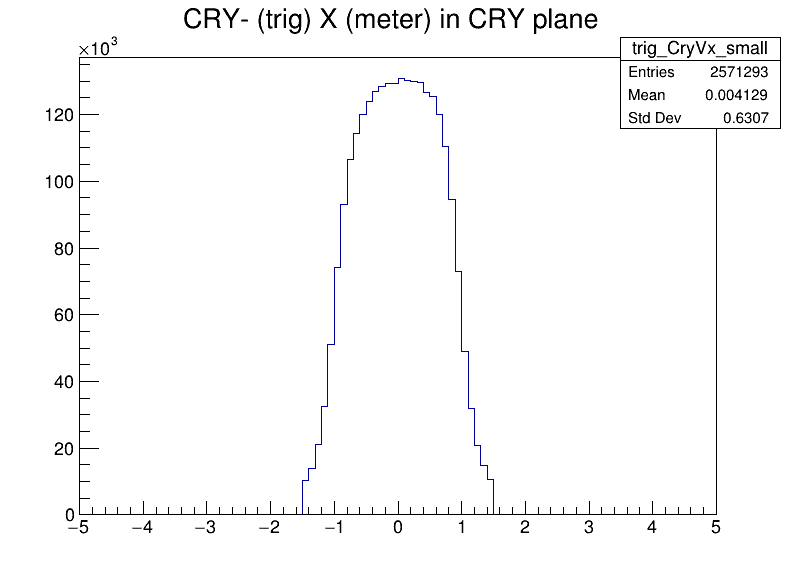

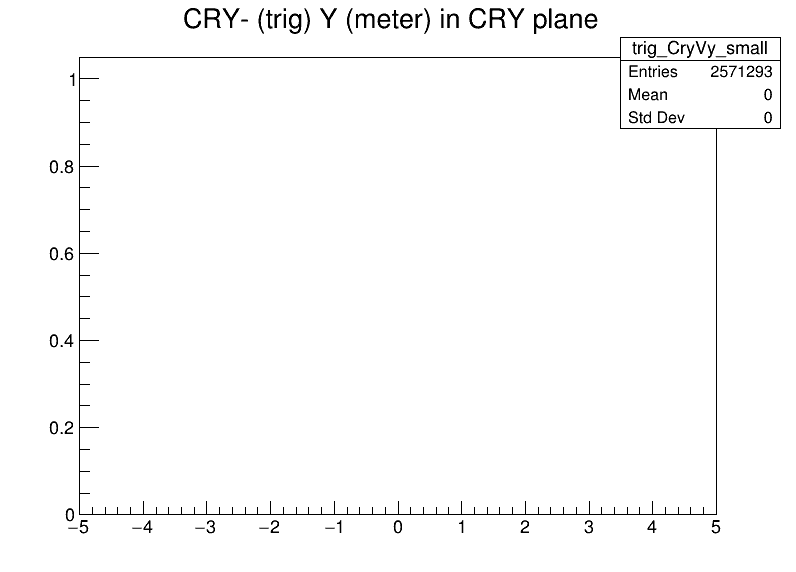

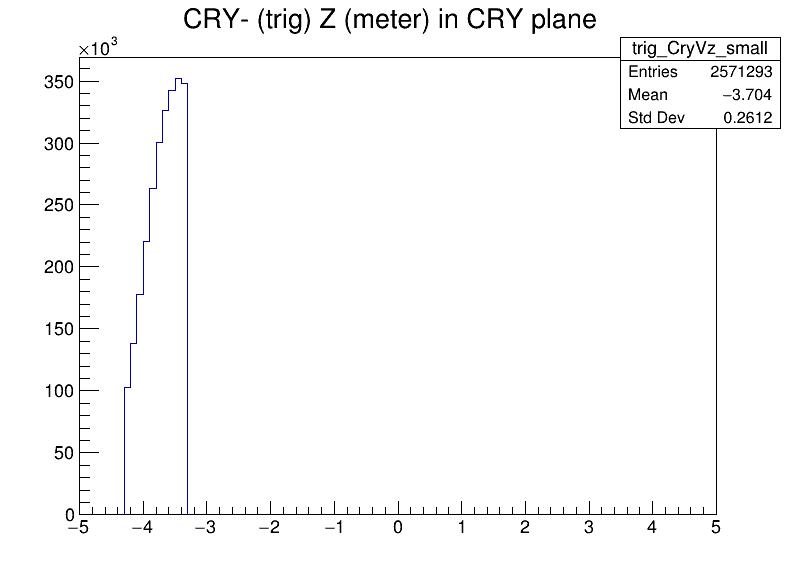

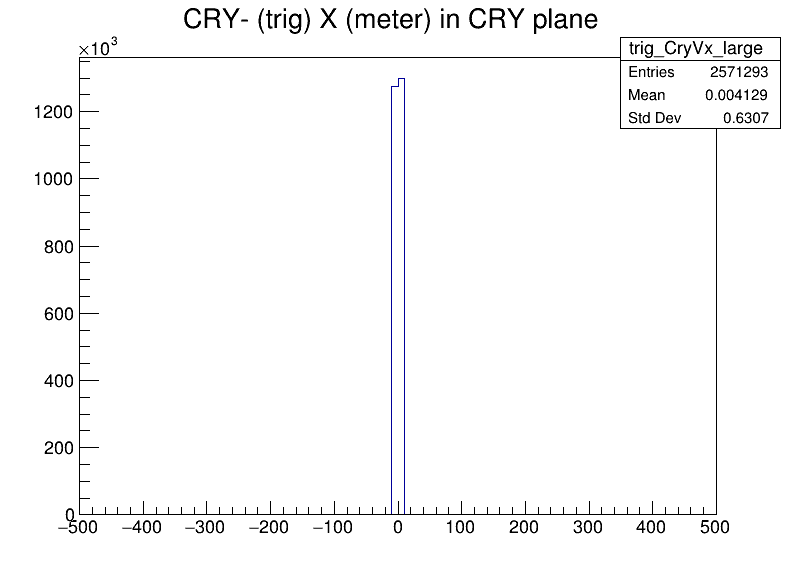

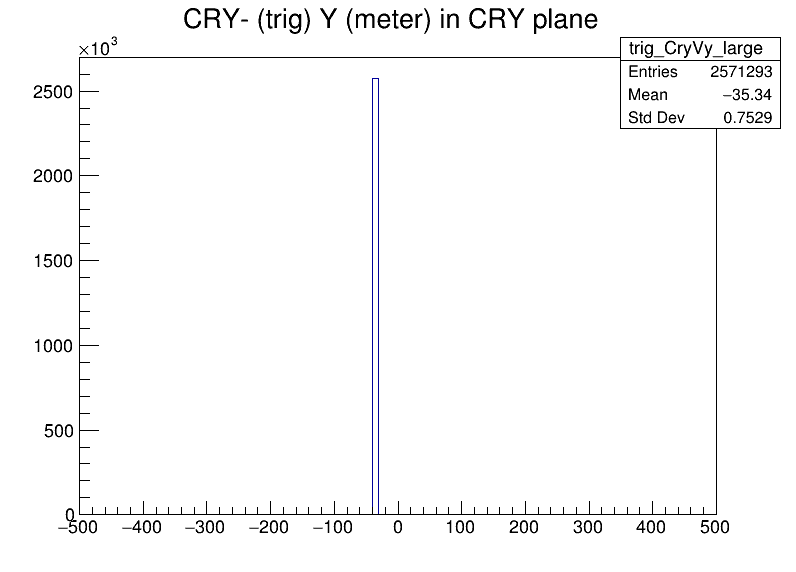

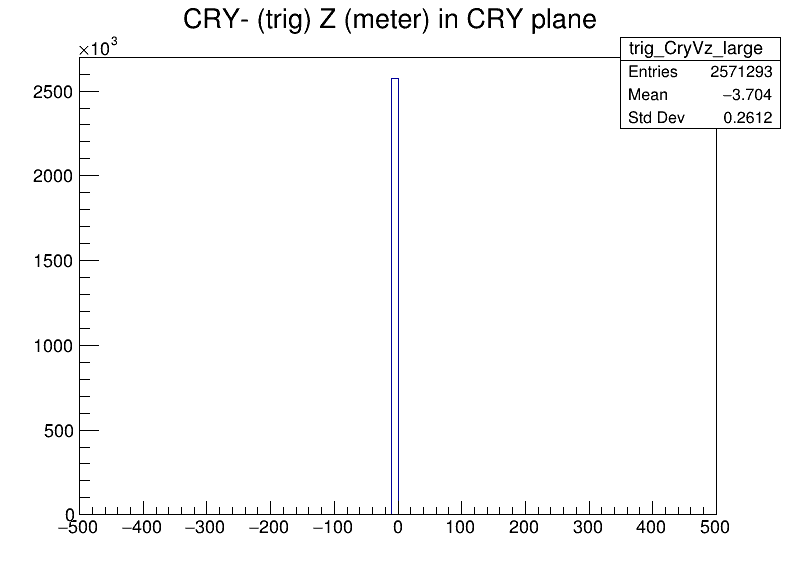

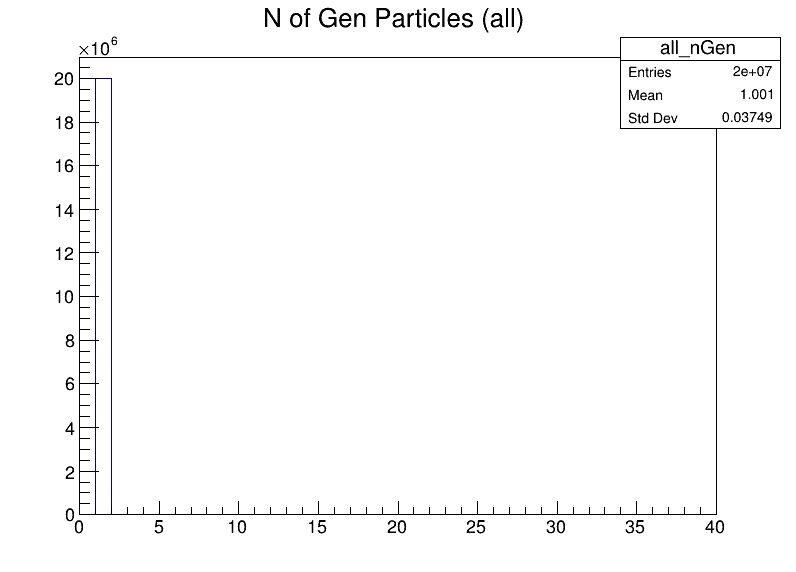

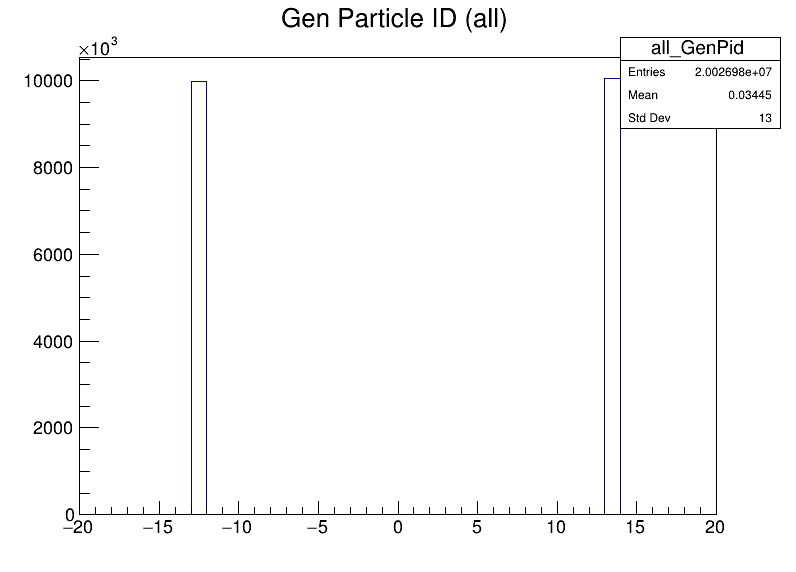

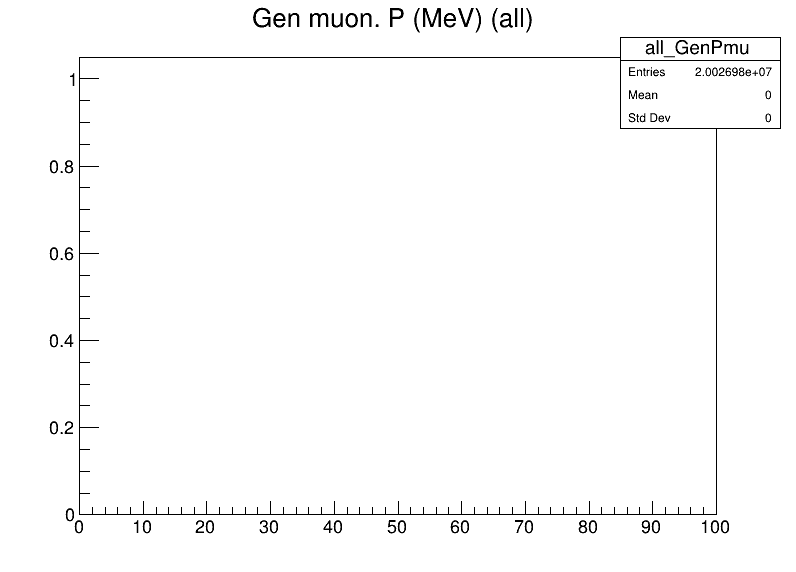

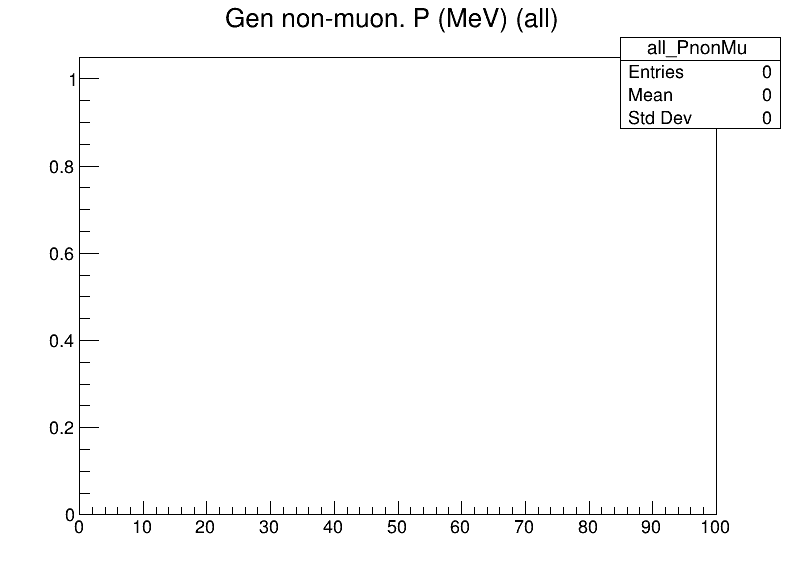

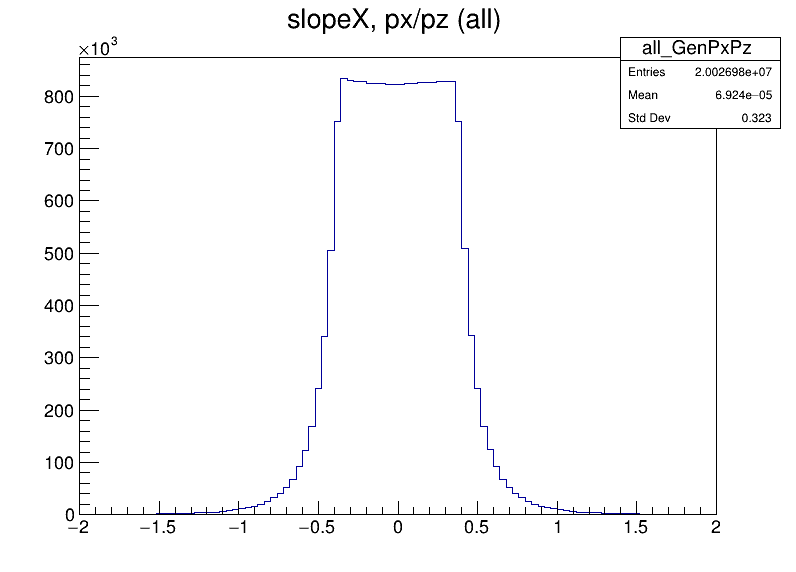

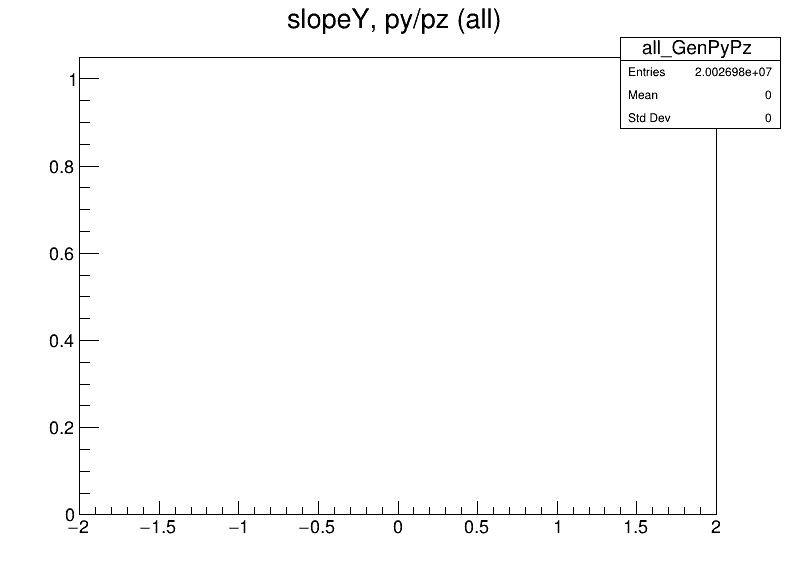

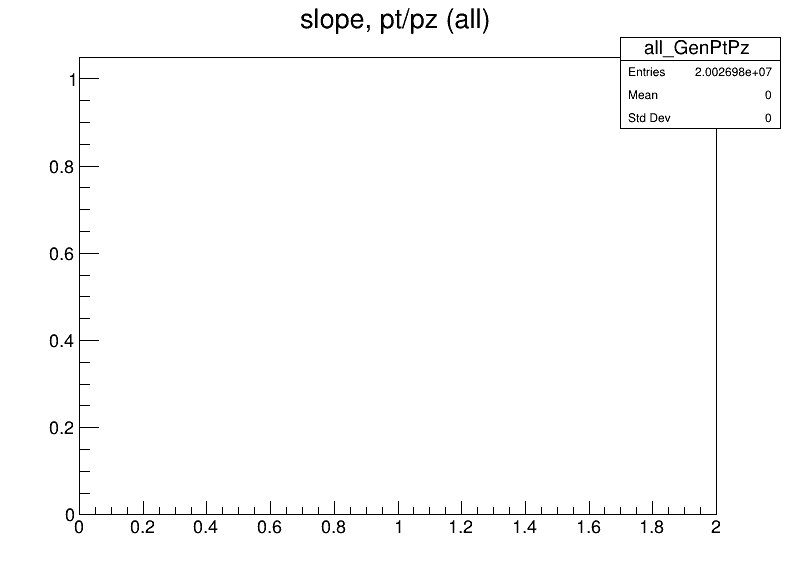

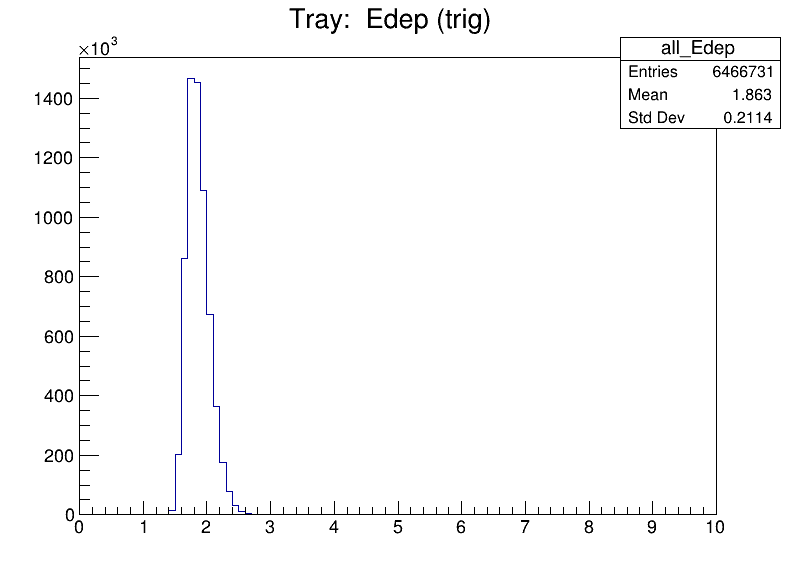

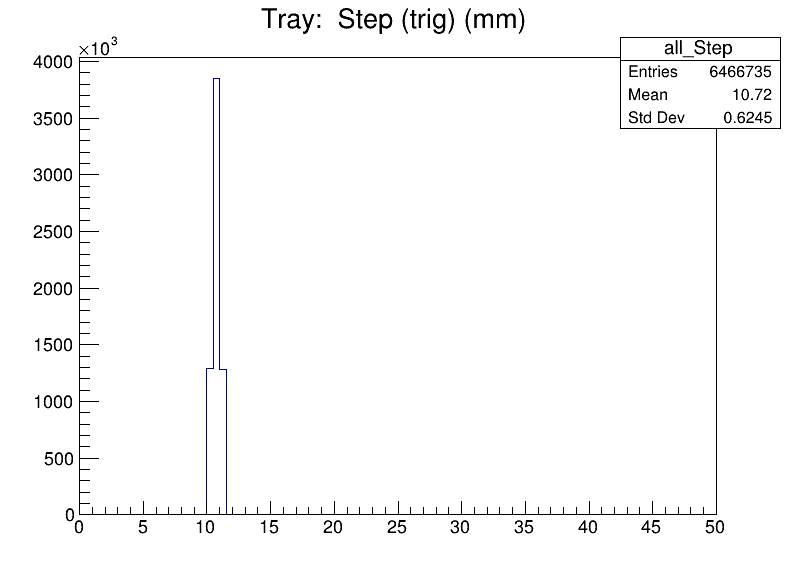

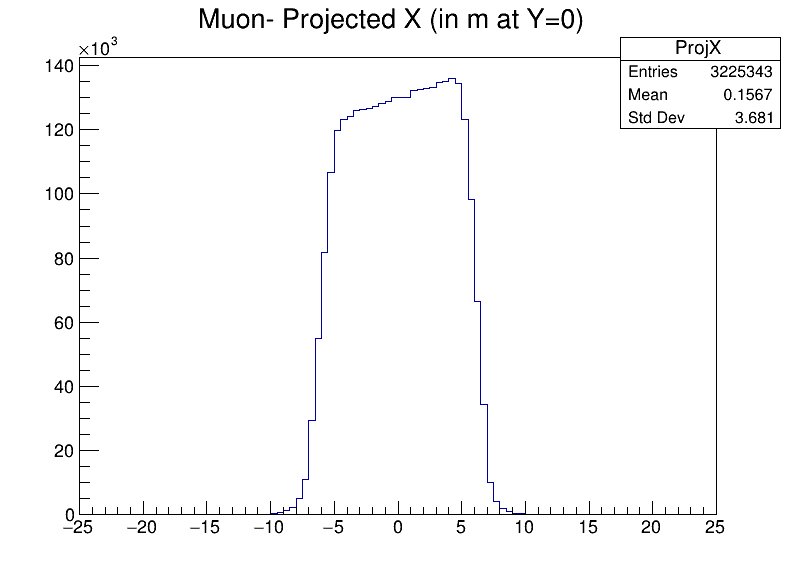

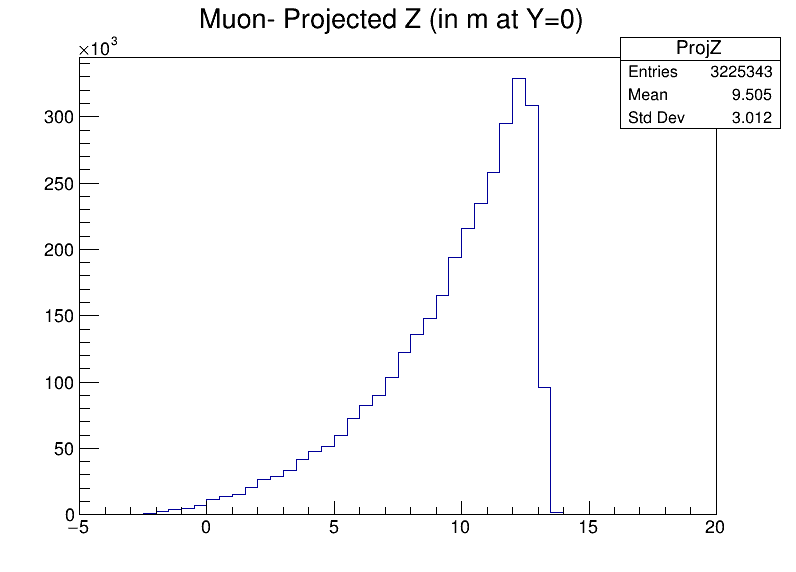

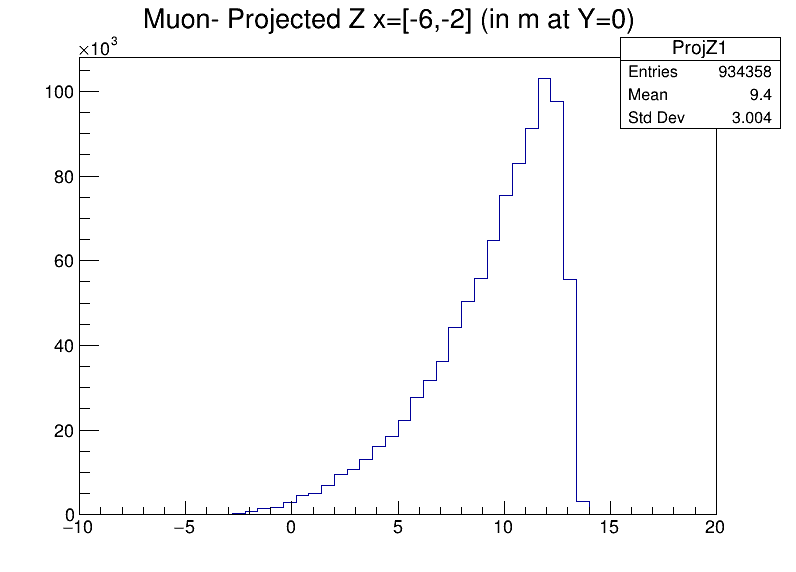

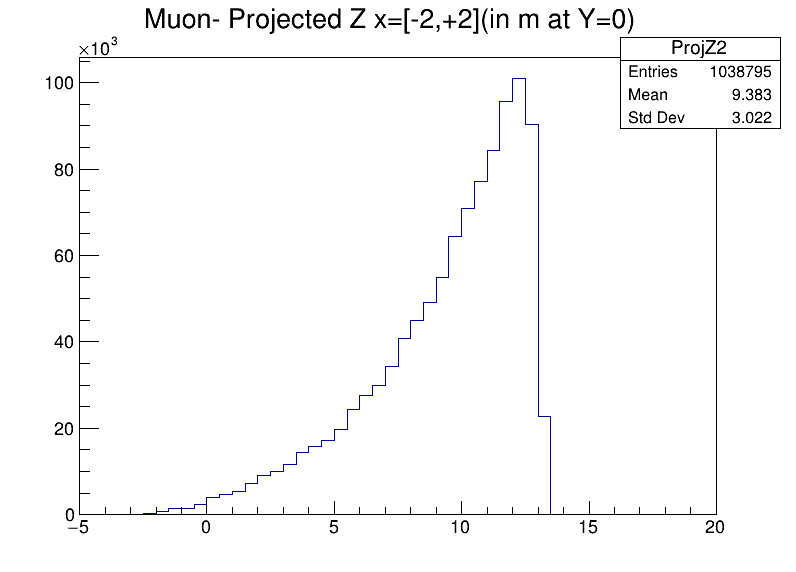

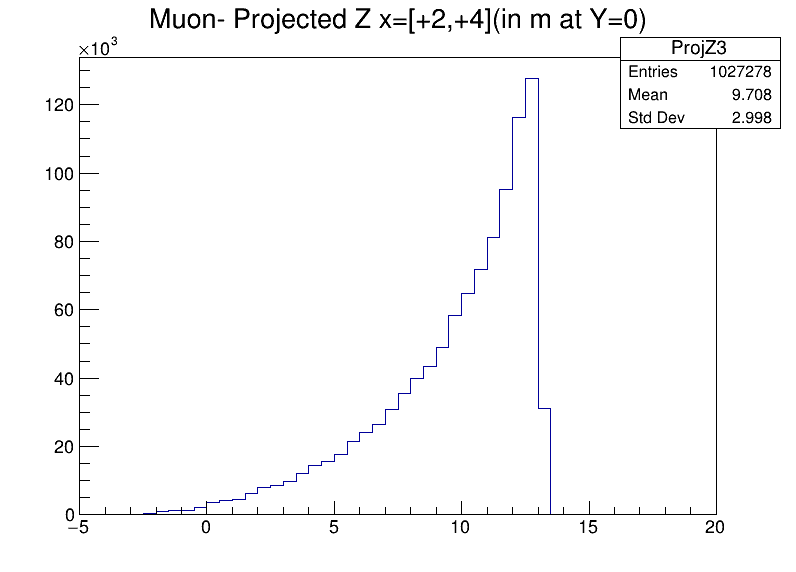

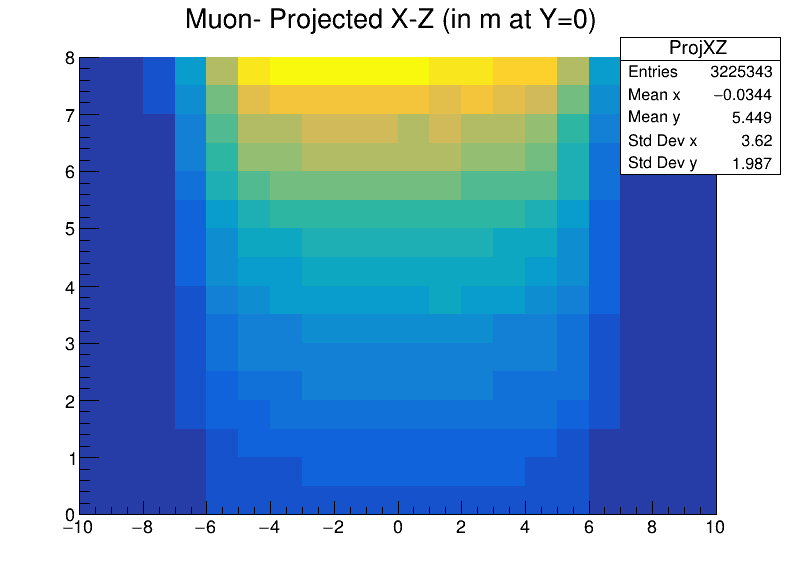

Info in <TCanvas::Print>: png file plots/all_CryTime.png has been created
Info in <TCanvas::Print>: png file plots/all_nCry.png has been created
Info in <TCanvas::Print>: png file plots/all_CryPid.png has been created
Info in <TCanvas::Print>: png file plots/all_CryTheta.png has been created
Info in <TCanvas::Print>: png file plots/all_CryP.png has been created
Info in <TCanvas::Print>: png file plots/all_CryThStr.png has been created
Info in <TCanvas::Print>: png file plots/all_CryVx_small.png has been created
Info in <TCanvas::Print>: png file plots/all_CryVy_small.png has been created
Info in <TCanvas::Print>: png file plots/all_CryVz_small.png has been created
Info in <TCanvas::Print>: png file plots/all_CryVx_large.png has been created
Info in <TCanvas::Print>: png file plots/all_CryVy_large.png has been created
Info in <TCanvas::Print>: png file plots/all_CryVz_large.png has been created
Info in <TCanvas::Print>: png file plots/trig_nCry.png has been created
Info in <TCanvas::Pri

In [24]:
import ROOT
from IPython.display import Image, display
import os

# Open your ROOT file
f = ROOT.TFile("rootfiles/mc_ICv2_run101_C0RAA_20000000.root")



# Loop over all keys in the file
for key in f.GetListOfKeys():
    obj = key.ReadObj()  # retrieve the object
    # Check if the object is a histogram (TH1 or any derived class)
    if obj.InheritsFrom("TH1"):
        # Create a canvas for the histogram
        canvas = ROOT.TCanvas("c_" + obj.GetName(), "Canvas", 800, 600)
        obj.Draw()
        canvas.Update()
        # Define the output directory
        output_dir = "plots"

        # Ensure the directory exists
        os.makedirs(output_dir, exist_ok=True)

        # Save the canvas in the "plots" directory
        image_file = os.path.join(output_dir, obj.GetName() + ".png")
        canvas.SaveAs(image_file)
        # Display the image inline in the notebook
        display(Image(image_file))


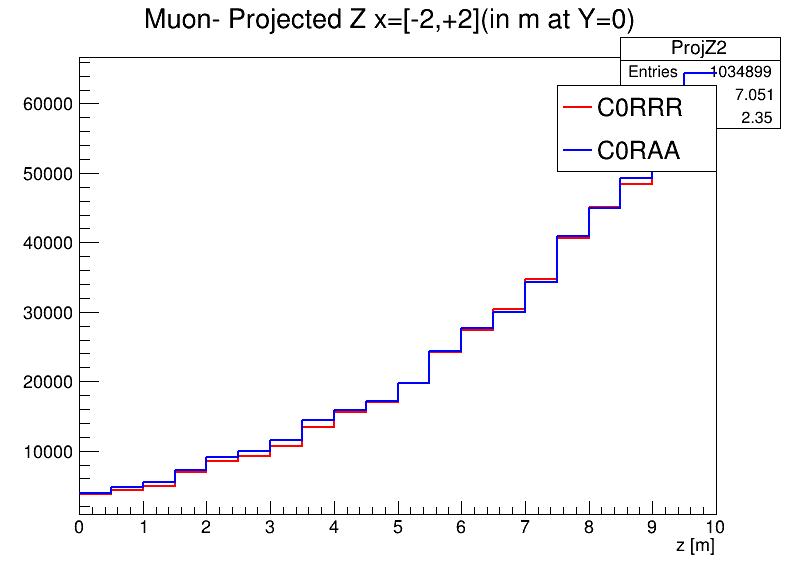

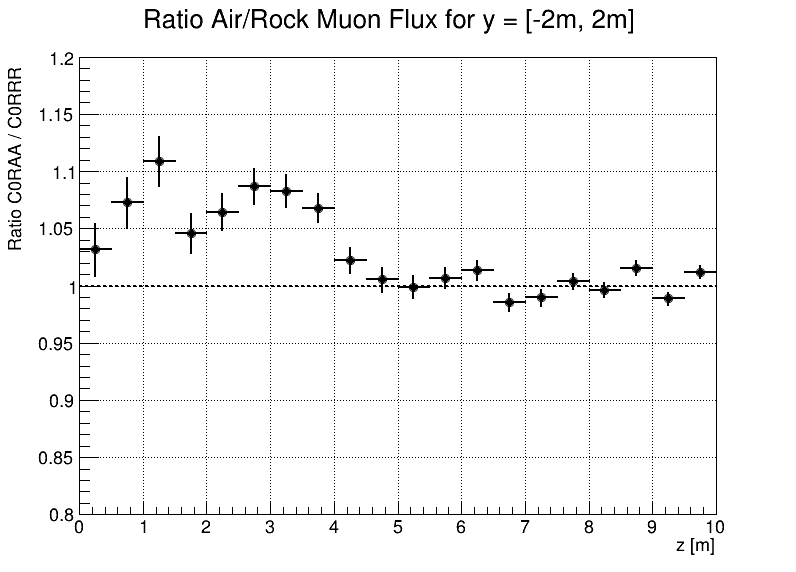

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/overlay_histogram.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ratio
Info in <TCanvas::Print>: png file plots/ratio_histogram.png has been created


In [39]:


# Open both ROOT files
file1 = ROOT.TFile("rootfiles/mc_ICv2_run101_C0RRR_20000000.root")
file2 = ROOT.TFile("rootfiles/mc_ICv2_run101_C0RAA_20000000.root")

# Retrieve histograms
hist1 = file1.Get("ProjZ2")
hist2 = file2.Get("ProjZ2")

# Check if histograms exist
if not hist1 or not hist2:
    print("One or both histograms not found!")
else:
    # Set x-axis range
    hist1.GetXaxis().SetRangeUser(0, 10)
    hist2.GetXaxis().SetRangeUser(0, 10)
    hist1.GetXaxis().SetTitle("z [m]")
    hist2.GetXaxis().SetTitle("z [m]")

    # Reset to auto-scaling for y-axis
    hist1.SetMaximum(-1111)
    hist2.SetMaximum(-1111)

    # Set line colors
    hist1.SetLineColor(ROOT.kRed)   # Red for first histogram
    hist2.SetLineColor(ROOT.kBlue)  # Blue for second histogram
    hist1.SetLineWidth(2)
    hist2.SetLineWidth(2)

    # Create canvas
    canvas = ROOT.TCanvas("c", "Canvas", 800, 600)

    # Draw histograms
    hist1.Draw()       # Draw first histogram
    hist2.Draw("SAME") # Overlay second histogram

    # Add a legend
    legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.85)  # x1, y1, x2, y2
    legend.AddEntry(hist1, "C0RRR", "l")
    legend.AddEntry(hist2, "C0RAA", "l")
    legend.Draw()

    # Update and save
    canvas.Update()
    image_file = "plots/overlay_histogram.png"
    canvas.SaveAs(image_file)

    # Display inline
    display(Image(image_file))

    # Create a ratio histogram (hist2 / hist1)
    ratio_hist = hist2.Clone("ratio_hist")  # Clone hist2 to keep same binning

    ratio_hist.Reset()  # Clear contents before filling manually

    # Loop over bins and compute the ratio + correct errors
    for i in range(1, hist1.GetNbinsX() + 1):  # Bins start at 1 in ROOT
        N_C0RAA = hist2.GetBinContent(i)
        N_C0RRR = hist1.GetBinContent(i)
        
        if N_C0RRR > 0:  # Avoid division by zero
            ratio = N_C0RAA / N_C0RRR
            error_C0RAA = ROOT.TMath.Sqrt(N_C0RAA)
            error_C0RRR = ROOT.TMath.Sqrt(N_C0RRR)
            ratio_error = ratio * ROOT.TMath.Sqrt(
                (error_C0RAA / N_C0RAA) ** 2 + (error_C0RRR / N_C0RRR) ** 2
            )
        else:
            ratio = 0
            ratio_error = 0

        # Set bin content and error
        ratio_hist.SetBinContent(i, ratio)
        ratio_hist.SetBinError(i, ratio_error)


    ratio_hist.SetTitle("Ratio Air/Rock Muon Flux for y = [-2m, 2m]")
    # ratio_hist.Divide(hist1)  # Element-wise division of bins

    # Set line style and axis labels
    ratio_hist.SetLineColor(ROOT.kBlack)  # Black for ratio
    ratio_hist.SetMarkerStyle(20)  # Circle markers
    ratio_hist.SetMarkerSize(1.0)
    ratio_hist.GetYaxis().SetTitle("Ratio C0RAA / C0RRR")
    ratio_hist.GetXaxis().SetTitle(hist1.GetXaxis().GetTitle())


    # Set y-axis range (optional)
    ratio_hist.SetMinimum(0.8)  # Adjust as needed
    ratio_hist.SetMaximum(1.2)

    # Create canvas
    canvas_ratio = ROOT.TCanvas("c_ratio", "Ratio Canvas", 800, 600)

    # Draw ratio histogram
    ratio_hist.SetStats(False)  # Disable stats box for this histogram only
    ratio_hist.Draw("E")  # "E" draws error bars

    # Create a horizontal line at y = 1
    line = ROOT.TLine(0, 1, 10, 1)
    line.SetLineColor(ROOT.kBlack)
    line.SetLineStyle(2)  # Dashed line
    line.SetLineWidth(2)
    line.Draw("SAME")  # Draw on the same canvas

    # Update and save
    canvas_ratio.SetGrid()
    canvas_ratio.Update()
    ratio_image_file = "plots/ratio_histogram.png"
    canvas_ratio.SaveAs(ratio_image_file)

    # Display inline
    display(Image(ratio_image_file))


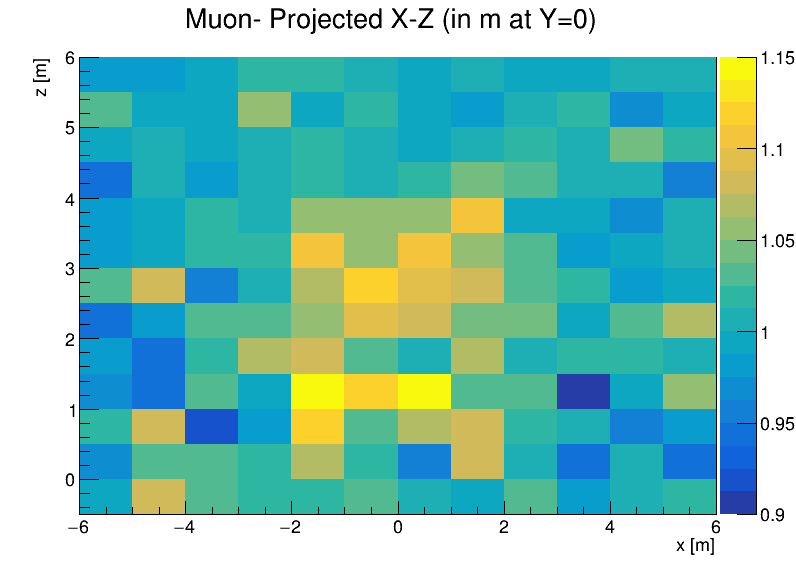

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ratio2D
Info in <TCanvas::Print>: png file plots/ratio_2D_histogram.png has been created


In [51]:
# Open both ROOT files
file1 = ROOT.TFile("rootfiles/mc_ICv2_run101_C0RRR_20000000.root")
file2 = ROOT.TFile("rootfiles/mc_ICv2_run101_C0RAA_20000000.root")

# Retrieve 2D histograms
hist2D_1 = file1.Get("ProjXZ")  # C0RRR
hist2D_2 = file2.Get("ProjXZ")  # C0RAA

# Check if histograms exist
if not hist2D_1 or not hist2D_2:
    print("One or both 2D histograms not found!")
else:
    # Clone the second histogram and divide
    ratio_hist2D = hist2D_2.Clone("ratio_hist2D")  # Clone to keep binning
    ratio_hist2D.Divide(hist2D_1)  # Directly divide the two 2D histograms

    # Create canvas
    canvas_ratio2D = ROOT.TCanvas("c_ratio2D", "2D Ratio Canvas", 800, 600)

    # Draw the ratio 2D histogram as a color map
    ratio_hist2D.SetMinimum(0.9)  # Set min for the z-axis
    ratio_hist2D.SetMaximum(1.15)  # Set max for the z-axis

    ratio_hist2D.GetXaxis().SetRangeUser(-6, 6)  # Set X-axis range
    ratio_hist2D.GetYaxis().SetRangeUser(-6, 6)  # Set Y-axis range

    ratio_hist2D.GetXaxis().SetTitle("x [m]")
    ratio_hist2D.GetYaxis().SetTitle("z [m]") 

    ratio_hist2D.Draw("COLZ")  # "COLZ" enables the color palette
    ratio_hist2D.SetStats(False)

    # Update and save
    canvas_ratio2D.Update()
    ratio_2D_image_file = "plots/ratio_2D_histogram.png"
    canvas_ratio2D.SaveAs(ratio_2D_image_file)

    # Display inline
    display(Image(ratio_2D_image_file))


In [12]:
for key in f.GetListOfKeys():
    obj = key.ReadObj()  # retrieve the object
    # Check if the object is a histogram (TH1 or any derived class)
    if obj.InheritsFrom("TH1"):
        print(obj.GetName())

all_CryTime
all_nCry
all_CryPid
all_CryTheta
all_CryP
all_CryThStr
all_CryVx_small
all_CryVy_small
all_CryVz_small
all_CryVx_large
all_CryVy_large
all_CryVz_large
trig_nCry
trig_CryP
trig_CryVx_small
trig_CryVy_small
trig_CryVz_small
trig_CryVx_large
trig_CryVy_large
trig_CryVz_large
all_nGen
all_GenPid
all_GenPmu
all_PnonMu
all_GenPxPz
all_GenPyPz
all_GenPtPz
all_Edep
all_Step
ProjX
ProjZ
ProjZ1
ProjZ2
ProjZ3
ProjXZ
